In [2]:
#Deep Learning
#!pip3 install keras
# Import necessary modules
import time
import keras
from keras.layers import Dense
from keras.models import Sequential,model_from_json
from keras.utils import to_categorical
from toto import *
lresult, dataset = loadTotoData()
#print(lresult)
print(dataset.head())

Using TensorFlow backend.


['SGH.csv', 'PPv3.csv', 'TestResult.csv', 'PPv3-Predict.csv']
Done
1521


/Users/walter/Software/TotoResearch/toto.py:246: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X['S_3'] = X['S'] // (360.0/deg)
/Users/walter/Software/TotoResearch/toto.py:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X['L_3'] = X['L'] // (360.0/deg)
/Users/walter/Software/TotoResearch/toto.py:248: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.h

    S_3   L_3   M_3  R_3   E_3  A_3   V_3  J_3  U_3
0   6.0  11.0  10.0  0.0   9.0  0.0  11.0 -5.0 -3.0
1   8.0  11.0  10.0  0.0   9.0  0.0  11.0 -5.0 -3.0
2  10.0  11.0  10.0  0.0  10.0  0.0  11.0 -5.0 -3.0
3  12.0  11.0  10.0  0.0  10.0  0.0  11.0 -5.0 -3.0
4   1.0  11.0  10.0  0.0  10.0  0.0  12.0 -5.0 -3.0


/Users/walter/Software/TotoResearch/toto.py:251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X['A_3'] = X['A'] // (360.0/deg)
/Users/walter/Software/TotoResearch/toto.py:252: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X['V_3'] = X['V'] // (360.0/deg)
/Users/walter/Software/TotoResearch/toto.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.h

In [1]:
#DATA TO USE
def getAdjustedData(df):
    cols = ['L','M','S', 'R','E','A','V' ,'J','U','K']
    X = df[cols]

    #Use only Planet Positions Testing
    cols = ['L','M','S', 'R','E','A','V' ,'J','U','K']
    X = df[cols]
    deg = 31.2
    deg = 365/(30)    v
    X['S_3'] = X['S'] // (360.0/deg)
    X['L_3'] = X['L'] // (360.0/deg)
    X['M_3'] = X['M'] // (360.0/deg)
    X['R_3'] = X['R'] // (360.0/deg)
    X['E_3'] = X['E'] // (360.0/deg)
    X['A_3'] = X['A'] // (360.0/deg)
    X['V_3'] = X['V'] // (360.0/deg)
    X['J_3'] = X['J'] // (360.0/deg)
    X['U_3'] = X['U'] // (360.0/deg)

    X = X.drop(cols, axis=1)
    
    # X['S_2'] = X['S'] // 30.0
    # X['L_2'] = X['L'] // 30.0
    # X['M_2'] = X['M'] // 30.0
    # X['S_1'] = X['S'] // 27.0
    # X['L_1'] = X['L'] // 27.0
    # X['M_1'] = X['M'] // 27.0

    return X


X = getAdjustedData(df)
related_X = X
dataset = related_X


lresult = np.sort(lr.values[:, ::-1])


[150, 99, -42, 23]
21369.0


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def getDFofN(n):
    PN = loadResult(lresult, n)
    return pd.DataFrame({'N':PN})

# def getDFofN(n):
#     PN = loadResult(lresult, n)
#     return pd.DataFrame({'N':PN})


In [4]:
#Feature Selection - Using SelectKBest
#Univariate 
#
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

X = dataset
y = getDFofN(2)

selector = SelectKBest(f_classif, k=3)
selector.fit(X, y)

X_new = selector.transform(X)
X.columns[selector.get_support(indices=True)]
print(selector.scores_)
vector_names = list(X.columns[selector.get_support(indices=True)])
print(vector_names)
print(selector.get_support(indices=True))
print(X.columns)

[0.73720635 0.95775617 1.11328157 0.83744531 1.01131043 0.81080241
 1.05135847 1.10261904 0.88215425]
['M_3', 'V_3', 'J_3']
[2 6 7]
Index(['S_3', 'L_3', 'M_3', 'R_3', 'E_3', 'A_3', 'V_3', 'J_3', 'U_3'], dtype='object')


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature ranking:
     importance
S_3    0.347987
E_3    0.110288
V_3    0.104594
A_3    0.084242
M_3    0.080328
L_3    0.080105
J_3    0.078516
U_3    0.058065
R_3    0.055876
1. feature 0 (0.347987)
2. feature 4 (0.110288)
3. feature 6 (0.104594)
4. feature 5 (0.084242)
5. feature 2 (0.080328)
6. feature 1 (0.080105)
7. feature 7 (0.078516)
8. feature 8 (0.058065)
9. feature 3 (0.055876)


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d a

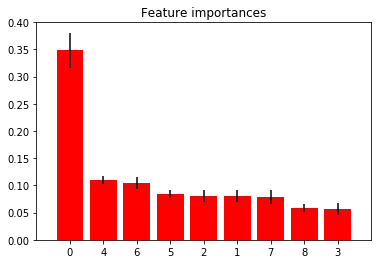

       S_3   L_3   M_3  R_3   E_3   A_3   V_3  J_3  U_3
0      6.0  11.0  10.0  0.0   9.0   0.0  11.0 -5.0 -3.0
1      8.0  11.0  10.0  0.0   9.0   0.0  11.0 -5.0 -3.0
2     10.0  11.0  10.0  0.0  10.0   0.0  11.0 -5.0 -3.0
3     12.0  11.0  10.0  0.0  10.0   0.0  11.0 -5.0 -3.0
4      1.0  11.0  10.0  0.0  10.0   0.0  12.0 -5.0 -3.0
5      2.0  12.0  10.0  0.0  10.0   0.0   0.0 -5.0 -3.0
6      3.0  12.0  10.0  0.0  10.0   0.0   0.0 -5.0 -3.0
7      5.0   0.0  10.0  0.0  11.0   0.0   0.0 -5.0  2.0
8      6.0   0.0  11.0  0.0  11.0   1.0   0.0 -5.0  2.0
9      8.0   0.0  11.0  0.0  11.0   1.0   0.0 -5.0  2.0
10    10.0   0.0  11.0  0.0  11.0   1.0   0.0 -5.0  2.0
11    12.0   0.0  11.0  0.0  11.0   1.0   0.0 -5.0  2.0
12     1.0   0.0  11.0  0.0  12.0   1.0   0.0 -5.0  2.0
13     2.0   0.0  11.0  0.0   0.0   1.0   1.0 -5.0  2.0
14     3.0   0.0  11.0  0.0   0.0   1.0   1.0 -5.0  2.0
15     5.0   0.0  11.0  0.0   0.0   1.0   1.0 -5.0  2.0
16     7.0   0.0  12.0  0.0  -1.0   1.0   1.0 -5

In [5]:
#Outlier Detection
def get_rf_feat_importances(X,Y):

    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X, Y)

    forest = rf
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    feature_importances = pd.DataFrame(rf.feature_importances_, 
                                       index = X.columns, 
                                       columns=['importance']).sort_values('importance', ascending=False)

    print(feature_importances)
    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

    return rf.feature_importances_

get_rf_feat_importances(dataset, getDFofN(1))


print(dataset)

In [6]:
#Dimensionality Reduction



In [7]:
#Set Predict Number
#loadResult(lresult, 1)
# PredictNumberPositions = 1
# PN = loadResult(lresult, PredictNumberPositions)
# dfPN = pd.DataFrame({'N':PN})

In [8]:
#PCA to determine the key coponents


In [9]:

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y

[ 1.  2.  5.  8. 17.]


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


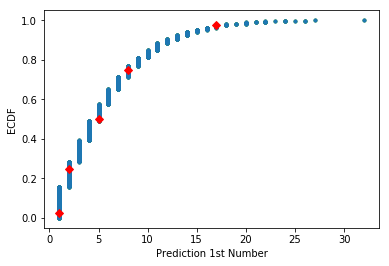

Mean:  5.84155161078238


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [10]:
# Compute ECDFs

PN = getDFofN(1)['N']
x_set, y_set = ecdf(PN)

# Plot all ECDFs on the same plot
plt.plot(x_set, y_set, marker='.', linestyle='none', color='green')

#ECDF with Percentile Plot
# Specify array of percentiles: percentiles
percentiles = [2.5, 25, 50, 75, 97.5]

# Compute percentiles: ptiles_vers
pctiles = np.percentile(PN, percentiles)

# Print the result
print(pctiles)

#Plot ECDF
# Plot the ECDF
_ = plt.plot(x_set, y_set, '.')
_ = plt.xlabel('Prediction 1st Number')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
p = [i/100.0 for i in percentiles]
_ = plt.plot(pctiles, p, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()


print("Mean: ", np.mean(loadResult(lresult, 1)) )

In [11]:
def encode(data):
    print('Shape of data (BEFORE encode): %s' % str(data.shape))
    encoded = to_categorical(data)
    print('Shape of data (AFTER  encode): %s\n' % str(encoded.shape))
    return encoded

#print(dataset.shape)

In [12]:
from matplotlib.pyplot import figure

def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(1)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'r', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
#plot_history(history)

In [13]:
from keras.callbacks import Callback
#Not used because not working
class EarlyStoppingByAccuracy(Callback):
    def __init__(self, monitor='accuracy', value=0.98, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def set_model(m):
        print('set model called.')
    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current >= self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

In [20]:
dataset.shape[1] 
target.shape[1]

1

/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Processing n =  1
nTimes =  1  Time taken:  2387.117417999998  


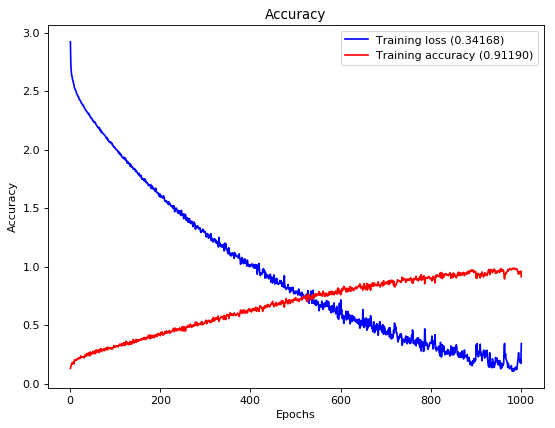

Saved model to disk
Processing n =  1


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


nTimes =  1  Time taken:  2703.997265000002  


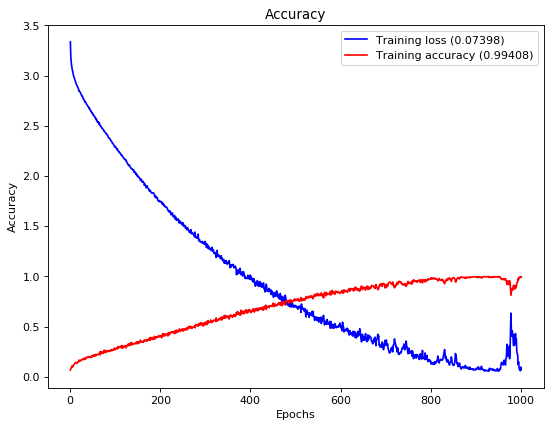

Saved model to disk
Processing n =  1


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


nTimes =  1  Time taken:  2481.6237029999975  


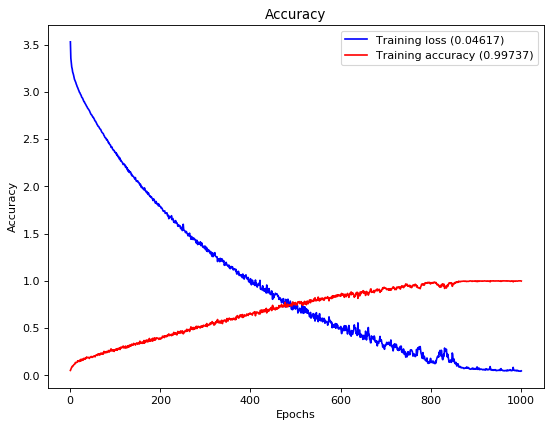

Saved model to disk
Processing n =  1


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


nTimes =  1  Time taken:  2520.2293910000008  


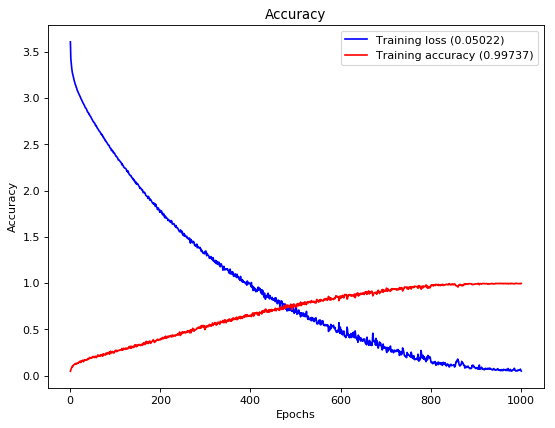

Saved model to disk
Processing n =  1


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


nTimes =  1  Time taken:  2406.4298479999998  


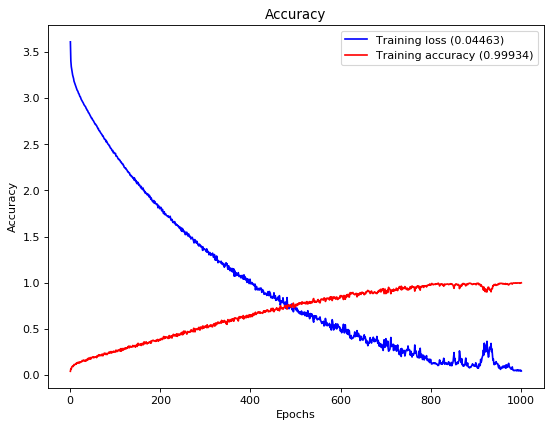

Saved model to disk
Processing n =  1


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


nTimes =  1  Time taken:  2670.864039  


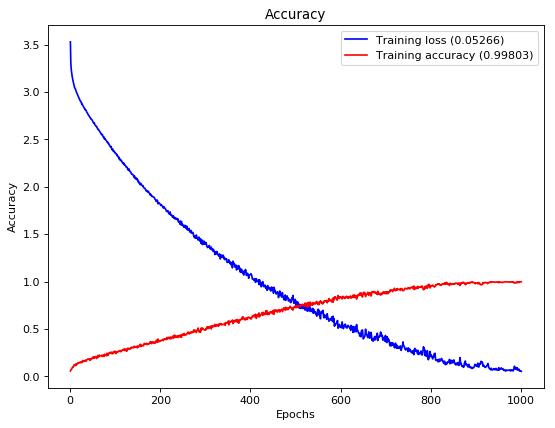

Saved model to disk
Processing n =  1


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


nTimes =  1  Time taken:  2613.711973000005  


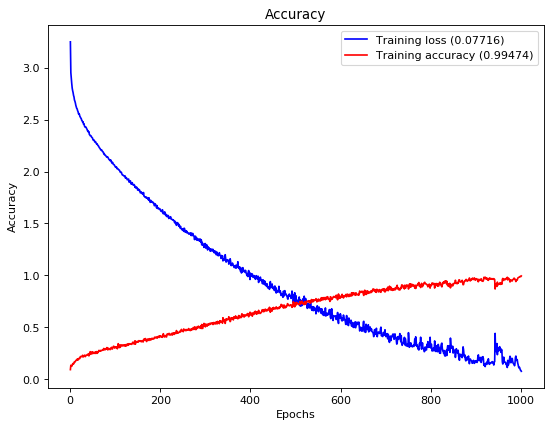

Saved model to disk


In [38]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
import json as simplejson
from keras import regularizers
from sklearn import preprocessing

alg_no = 1
#tmp = dataset
#dataset = preprocessing.scale(dataset)
# sns.pairplot(dataset)
# plt.show()
for PredictNumber in range(1, 8):
#     PredictNumberPositions = PredictNumber
#     PN = loadResult(lresult, PredictNumberPositions)
#     dfPN = pd.DataFrame({'N':PN})

    dfPN = getDFofN(PredictNumber)
    target = to_categorical(dfPN)
    # Set up the model
    ##10
    for nTimes in range(1,2):
        model = Sequential()
        model.add(Dense(1200, activation='relu', kernel_regularizer=regularizers.l2(0.00001), input_dim=dataset.shape[1]))  #input_shape =(1521,)))
        model.add(Dense(1200, activation='relu'))  #input_shape =(1521,)))

#         for i in range(10):
#             model.add(Dense(10, activation='relu'))
#           keras.layers.Dropout(0.5),
#
        # Add the output layer
        model.add(Dense(target.shape[1], activation='softmax', input_dim=target.shape[1]))

        # Compile the model
        #For Binary
        model.compile(optimizer='sgd', metrics=['accuracy'],loss='categorical_crossentropy')
        #model.compile(optimizer='sgd',metrics=['accuracy'],loss='sparse_categorical_crossentropy')

        #print(dataset.head())
        #print(target)

        # Fit the model
        early_stopping = EarlyStopping(patience=2, mode='max')
        #early_stopping = EarlyStoppingByAccuracy(monitor='acc', value=0.50, verbose=1),

    #checkpoint = ModelCheckpoint(, verbose=1, monitor='val_loss',save_best_only=true, mode='auto')  


    #    filepath = "weights.best.hdf5"
    #    checkpoint = ModelCheckpoint('model-{epoch:03d}.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
    #    checkpoint = ModelCheckpoint(str(PredictNumber) + '_{acc:.3f}_{loss:3f}.hdf5', monitor='acc', verbose=2, save_best_only=True, mode='max')

        start = time.clock()
        print("Processing n = ", alg_no)
#        history = model.fit(dataset, target, epochs=1000, verbose=0) #, callbacks=[early_stopping]) #, checkpoint])    

        history = model.fit(dataset, target, epochs=1000, verbose=0) #, callbacks=[early_stopping]) #, checkpoint])    
        print("nTimes = ", nTimes, " Time taken: ", (time.clock() - start),  " ")

        plot_history(history)
        
        # serialize model to JSON
        model_json = model.to_json()
        with open(str(alg_no) + '_' + str(PredictNumber) + "_model.json", "w") as json_file:
            json_file.write(simplejson.dumps(simplejson.loads(model_json), indent=4))

        # serialize weights to HDF5
        model.save_weights(str(alg_no) + '_' + str(PredictNumber) + "_model.h5")
        print("Saved model to disk")



        
        
#    best = save_best_model(10, "output", 5, ".hdf5")
    
##    model.load_weights(best)
##    model.save("best-" + nTimes + ".h5s")

# Calculate predictions: predictions
#predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
#predicted_prob_true = predictions[:,1]

# print predicted_prob_true
#print(predicted_prob_true)

# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
import json as simplejson

algo_no = 2
for PredictNumber in range(1, 1):
    PredictNumberPositions = PredictNumber
    PN = loadResult(lresult, PredictNumberPositions)
    dfPN = pd.DataFrame({'N':PN})
    target = to_categorical(dfPN)
    # Set up the model
    ##10
    for nTimes in range(1,2):
        model = Sequential()
        model.add(Dense(420, activation='tanh', input_dim=dataset.shape[1]))  #input_shape =(1521,)))
#         for i in range(3):
#             model.add(Dense(nTimes, activation='relu'))
#            keras.layers.Dropout(0.5),

        # Add the output layer
        model.add(Dense(target.shape[1], activation='softmax', input_dim=target.shape[1]))

        # Compile the model
        #For Binary
#        optimizer = keras.optimizers.SGD(lr=0.01, nesterov=True)
        model.compile(optimizer='adam', metrics=['accuracy'],loss='categorical_crossentropy')
        #model.compile(optimizer='sgd',metrics=['accuracy'],loss='sparse_categorical_crossentropy')

        #print(dataset.head())
        #print(target)

        # Fit the model
#        early_stopping = EarlyStopping(patience=2, mode='max')
        #early_stopping = EarlyStoppingByAccuracy(monitor='acc', value=0.50, verbose=1),

    #checkpoint = ModelCheckpoint(, verbose=1, monitor='val_loss',save_best_only=true, mode='auto')  


    #    filepath = "weights.best.hdf5"
    #    checkpoint = ModelCheckpoint('model-{epoch:03d}.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
    #    checkpoint = ModelCheckpoint(str(PredictNumber) + '_{acc:.3f}_{loss:3f}.hdf5', monitor='acc', verbose=2, save_best_only=True, mode='max')

        start = time.clock()
        print("Processing n = ", algo_no)
        history = model.fit(dataset, target, epochs=100, verbose=0) #, callbacks=[early_stopping]) #, checkpoint])    
        print(" Time taken: ", (time.clock() - start),  " ")

        plot_history(history)
        
        # serialize model to JSON
        model_json = model.to_json()
        with open(str(algo_no) + '_' + str(PredictNumber) + "_model.json", "w") as json_file:
            json_file.write(simplejson.dumps(simplejson.loads(model_json), indent=4))

        # serialize weights to HDF5
        model.save_weights(str(algo_no) + '_' + str(PredictNumber) + "_model.h5")
        print("Saved model to disk")

In [16]:
#sns.pairplot(dataset, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1)
#sns.pairplot(dataset, kind='reg', diag_kind='auto', markers=None, height=2.5, aspect=1)
#sns.heatmap(dataset.corr(), annot=True, fmt='.2f')

In [17]:
#Create Dummy Variables
# Create dummy variables with drop_first=True: df_region
target = pd.get_dummies(dfPN,drop_first=True)

# Print the new columns of df_region
print(target.columns)

# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, dataset, target, cv=5)

# Print the cross-validated scores
print(ridge_cv)



Index(['N'], dtype='object')
[-0.01092405  0.00013577 -0.0069266  -0.00381441 -0.01275081]


In [22]:
data2Predict.shape[1]

9

In [39]:

#PREDICT based on the saved Model
data2Predict_org = pd.read_csv('../input/PPv3-Predict.csv')
data2Predict_org.reset_index()

#print(data2Predict_org.columns)

data2Predict = getAdjustedData(data2Predict_org)

#Remove T, D and Results
#drop_cols = ['T', 'L','M','S','R','E','A','V' ,'J','U','K']
#data2Predict = data2Predict_org.drop(drop_cols, axis=1)

#print(data2Predict_org.columns)

#print(data2Predict.head())
algo_no = 1
dfResult = pd.DataFrame(data2Predict_org['D'])
for n in range(1, 8):
    # load json and create model
    json_file = open(str(algo_no) + "_" + str(n)+'_model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)

    # load weights into new model
    loaded_model.load_weights(str(algo_no) + "_" + str(n)+"_model.h5")
    print("Loaded model from disk " + str(n)+"_model" )

    loaded_model.compile(optimizer='sgd', metrics=['accuracy'],loss='categorical_crossentropy')
    predictions = loaded_model.predict_classes(data2Predict)

#    print(predictions)
    s = 'N' +str(n)
    dfPN = pd.DataFrame({s:np.argmax(to_categorical(predictions), axis = 1)})
    if ( len(dfResult) == 0 ):
        dfResult = dfPN
    else:
        dfResult = pd.concat([dfResult, dfPN], axis=1)
#    print ( str(n) + " Predicted: " + str(np.argmax(to_categorical(predictions), axis = 1)))

#print(dfResult)
#print(data2Predict_org['T'])

#dfResult = pd.DataFrame(data2Predict_org['T'])



# alg_no = 2
# for n in range(1, 8):
#     # load json and create model
#     json_file = open(str(alg_no) + '_' + str(n)+'_model.json', 'r')
#     loaded_model_json = json_file.read()
#     json_file.close()
#     loaded_model = model_from_json(loaded_model_json)

#     # load weights into new model
#     loaded_model.load_weights(str(alg_no) + '_' + str(n)+"_model.h5")
#     print("Loaded model from disk " + str(n)+"_model" )

#     loaded_model.compile(optimizer='adam', metrics=['accuracy'],loss='categorical_crossentropy')
#     predictions = loaded_model.predict_classes(data2Predict)

#     s = str(alg_no) + '_' + 'N' +str(n)
#     dfPN = pd.DataFrame({s:np.argmax(to_categorical(predictions), axis = 1)})
#     if ( len(dfResult) == 0 ):
#         dfResult = dfPN
#     else:
#         dfResult = pd.concat([dfResult, dfPN], axis=1)
# #    print ( str(n) + " Predicted: " + str(np.argmax(to_categorical(predictions), axis = 1)))

# #print(dfResult)


#Load Decision Tree

/Users/walter/Software/TotoResearch/toto.py:246: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X['S_3'] = X['S'] // (360.0/deg)
/Users/walter/Software/TotoResearch/toto.py:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X['L_3'] = X['L'] // (360.0/deg)
/Users/walter/Software/TotoResearch/toto.py:248: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.h

Loaded model from disk 1_model
Loaded model from disk 2_model
Loaded model from disk 3_model
Loaded model from disk 4_model
Loaded model from disk 5_model
Loaded model from disk 6_model
Loaded model from disk 7_model


In [ ]:
print(dfResult)

In [40]:
test_df = pd.read_csv('../input/TestResult.csv', sep='\s+', header=None, names=['D','N1','N2','N3','N4','N5','N6','N7'])
test_df['D'].replace(regex=True,inplace=True,to_replace=r'-',value=r'')
test_df['D'] = pd.to_numeric(test_df['D'])

cols = ['D', 'N1','N2','N3','N4','N5','N6','N7']
test_df = data2Predict_org.merge(test_df, left_on='D', right_on='D', how='inner')
test_df = test_df[cols]

tdfResult = dfResult.drop(dfResult.columns[0], axis=1) ;

actual_result = test_df[cols[1:]].values
predicted_result = tdfResult.values

matched = getIntersection(actual_result, predicted_result)

c = 0
for i in range(len(matched)):
    print(int(data2Predict_org.loc[i]['D']), ' ', actual_result[i], ' ', predicted_result[i], ' ', matched[c])
    c += 1
for i in range(c, len(predicted_result)):
    print(int(data2Predict_org.loc[i]['D']), ' Predicted: ', predicted_result[i], ' ')


20181001   [11 15 23 24 32 40 43]   [ 5 11 15 17 40 46 44]   [11 15 40]
20181004   [ 5 12 23 32 37 42 43]   [ 5  6 15 17 30 36 37]   [ 5 37]
20181008   [17 18 23 39 43 49  2]   [ 4 12 17 20 30 32 36]   [17]
20181011   [ 1 16 18 24 29 46 35]   [ 4  7 17 20 30 38 36]   []
20181015   [ 1  4 24 32 35 48 20]   [10  7 23 20 30 38 36]   [20]
20181018   [ 5 14 17 31 46 48 47]   [10  7 23 20 30 38 36]   []
20181022   [ 5 22 24 40 43 48  2]   [10  7 17 37 37 38 36]   []
20181025   [ 7  8 13 15 35 48 30]   [ 2  6 18 20 33 32 36]   []
20181029   [ 2  6 10 20 28 31 30]   [ 4  6 17 20 33 32 36]   [ 6 20]
20181101   [ 6 27 28 41 44 48 15]   [ 4  6 17 20 33 32 36]   [6]
20181105   [ 3  8 14 28 43 49 26]   [ 4 12 17 20 33 32 36]   []
20181108   [ 8 13 16 26 28 38 46]   [ 4 12 17 20 30 38 36]   [38]
20181112   [ 4 12 21 34 41 47 33]   [10  7 17 20 30 38 36]   []
20181115  Predicted:  [10  7 17 27 30 38 36]  
20181119  Predicted:  [ 4  7 11 25 27 33 38]  
20181122  Predicted:  [ 4 11 37 30 31 46 47]  
20

In [ ]:
21 25 27 36 39 44

In [ ]:
from sklearn.decomposition import PCA

model = PCA(n_components=10)

print(target)
# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit(dataset)

features = range(pca_features.n_components_)
plt.bar(features,pca_features.explained_variance_ )
plt.ylabel('Variances')
plt.xlabel('PCA Features')
plt.show()

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
# Save Model Using joblib
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

tree = DecisionTreeClassifier()

for PredictNumber in range(1, 8):
    PredictNumberPositions = PredictNumber
    PN = loadResult(lresult, PredictNumberPositions)
    dfPN = pd.DataFrame({'N':PN})
#    target = to_categorical(dfPN)
#    one_hot_data = pd.get_dummies(dfPN,drop_first=True)
    tree.fit(dataset, dfPN['N'])
    filename = str(PredictNumber) + '_dt_model.sav'
    joblib.dump(tree, filename)


data2Predict_org = pd.read_csv('../input/PPv3-Predict.csv')
data2Predict_org.reset_index()

#Remove T, D and Results
drop_cols = ['T', 'L','M','S','R','E','A','V' ,'J','U','K']
data2Predict = data2Predict_org.drop(drop_cols, axis=1)

#print(data2Predict.head())
dfResult = pd.DataFrame(data2Predict_org['T'])
for n in range(1, 8):
    filename = str(n) + '_dt_model.sav'
    loaded_model = joblib.load(filename)
    result = loaded_model.predict(data2Predict)
    print(result)
    